In [40]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [41]:
def PCA_svd(A,r,n):
    [x1, x2] = np.shape(A)
    mean = np.reshape(A.mean(axis=1), (x1,1))
    Ac = A - np.matmul(mean, np.ones((1,x2)) )
    u, s, vt = np.linalg.svd(Ac, full_matrices=True)
    U = u[:,:r]
    Vt = vt[:r,:]
    S = s[:r]
    sigma = np.diag(S)
    n1 = np.shape(Ac)[1]
    k = 1/np.sqrt(n1-1)
    y1 = np.random.normal(0, 0.1, r*n)
    y = np.reshape(y1, (r,n))
    temp1 = np.matmul(U, sigma)
    temp2 = np.matmul(temp1, y)
    V = k*temp2 + np.matmul(mean, np.ones((1,n)) )
    print(temp1) ##############
    return V

In [42]:
def delay_calc(v):
    v = np.reshape(v, (10,1))
    D = 2*np.ones((10,1))
    D[0] = 1
    D[2] = 1
    D[6] = 1
    d = D+(2.0/1.3)*D*(v-0.5)
    D9 = d[3]+d[8]+max(d[0], d[1])
    D6 = d[5]+max(d[2], d[5])
    D7 = d[6]+max(d[7], D6)
    Del = d[9]+max(D7, D9)
    return Del

In [43]:
f = open('vt-data.txt', "r")
mat =  np.genfromtxt(f, delimiter=",")

In [76]:
r = 1
n = 100
delay = np.zeros((n,1))

In [64]:
s = np.random.normal(0.5, 0.1, 10*n) # for part 1
V = np.reshape(s, (10,n))

In [71]:
V = PCA_svd(mat,r,n) # for part 2

[[-0.96500999]
 [-0.96559426]
 [-0.96556265]
 [-0.9659927 ]
 [-0.96592737]
 [-0.96564458]
 [-0.96536952]
 [-0.9658258 ]
 [-0.96587283]
 [-0.96537658]]


In [77]:
V = mat # for checking (change n=100)

In [78]:
for i in range(n):  # calculate delay
    delay[i] = delay_calc(V[:,i])

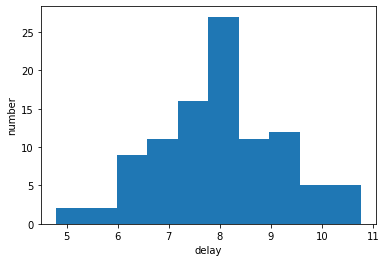

In [79]:
plt.hist(delay, bins = 10)
plt.xlabel('delay')
plt.ylabel('number')
plt.show()

In [80]:
np.std(delay)

1.1885777791299228

In [81]:
np.mean(delay)

7.987138461538462